In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\ajeeth\\Downloads\\emotion_dataset_raw.csv")

In [3]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


EDA

In [4]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [5]:
df['Emotion'].value_counts(ascending=False)

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

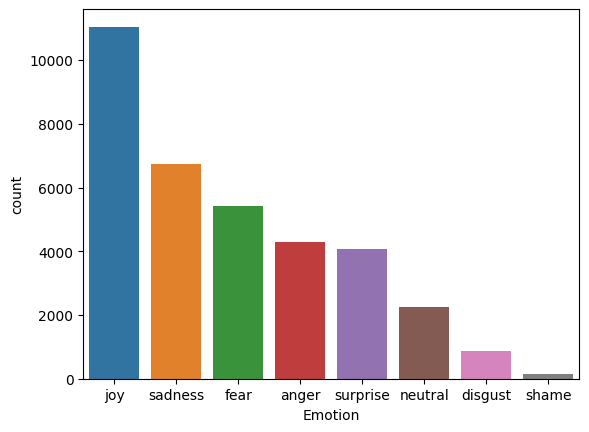

In [6]:
sns.countplot(x='Emotion',data=df,order=df['Emotion'].value_counts().index)
plt.show()

Sentiment Analysis

In [7]:
from textblob import TextBlob

In [8]:
def sentiment_calculator(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = 'positive'
    elif sentiment <0:
        result = 'negative'
    else:
        result = 'neutral'
    return result        

In [9]:
df['sentiment'] = df['Text'].apply(sentiment_calculator)

In [10]:
df.head()

,Emotion,Text,sentiment
0,neutral,Why ?,neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,negative
3,joy,Such an eye ! The true hazel eye-and so brill...,positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,neutral


In [11]:
df.groupby(['Emotion','sentiment']).count()

Text
Emotion  sentiment      
anger    negative   1787
         neutral    1386
         positive   1124
disgust  negative    325
         neutral     249
         positive    282
fear     negative   1534
         neutral    1843
         positive   2033
joy      negative   1682
         neutral    3648
         positive   5715
neutral  negative    178
         neutral    1523
         positive    553
sadness  negative   2630
         neutral    2127
         positive   1965
shame    negative     46
         neutral      50
         positive     50
surprise negative    623
         neutral    1545
         positive   1894

<AxesSubplot: xlabel='Emotion', ylabel='count'>

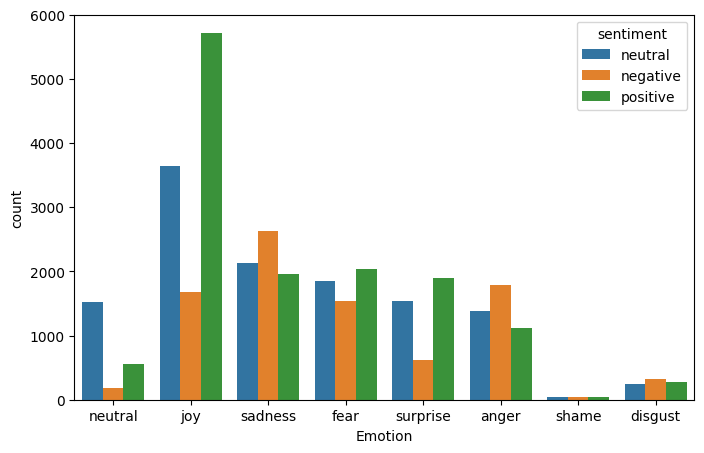

In [12]:
# visualising the emotion and sentiment
plt.figure(figsize = (8,5))
sns.countplot(x='Emotion',data=df,hue='sentiment') 

Text cleaning

In [13]:
import neattext.functions as nfx

In [14]:
#dir(nfx)

In [15]:
#removing punctuations
df['Clean_Text'] = df['Text'].apply(nfx.remove_punctuations)

In [16]:
#removing usernames
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [17]:
#removing stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [18]:
#removing hashtags
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_hashtags)

In [19]:
#removing emojis
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_emojis)

In [20]:
df[['Text','Clean_Text']].head()

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular featur...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e ba...


In [21]:
df['Emotion'].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

In [26]:
#converting the clean_text columnn(joy) into a list
joy_list = df[df['Emotion']=='joy']['Clean_Text'].tolist()

In [28]:
#joy_list

In [29]:
#converting a list to a doc
joy_docs = ''.join(joy_list)

In [31]:
#joy_docs

In [32]:
#way of approach 1:
joy_emotion_keywords = {}
for i in joy_docs.split():
    if i not in joy_emotion_keywords:
        joy_emotion_keywords[i] = 1
    else:
        joy_emotion_keywords[i] += 1

In [33]:
common_joy_emotion_keywords = dict(sorted(joy_emotion_keywords.items(), key=lambda item: item[1], reverse=True)[:50])

print(common_joy_emotion_keywords)

{'amp': 643, 'day': 545, 'time': 432, 'Im': 427, 'like': 420, 'work': 370, 'Christmas': 359, 'good': 287, 'today': 286, 'happy': 278, 'going': 271, 'tomorrow': 267, 'love': 254, 'night': 236, 'got': 235, 'home': 232, '2': 226, 'school': 222, 'joy': 212, 'morning': 207, 'life': 194, 'hours': 191, 'feel': 177, 'year': 174, 'new': 170, 'long': 169, 'dont': 168, 'people': 165, 'days': 161, 'sleep': 155, 'family': 150, 'week': 148, 'great': 145, 'RT': 144, 'hour': 143, 'know': 136, 'God': 133, 'cant': 131, ':)': 124, '3': 121, 'friends': 120, 'friend': 119, 'de': 119, 'feeling': 118, 'felt': 116, 'old': 116, '4': 115, 'start': 114, 'u': 113, 'christmas': 113}


In [34]:
#way of approach 2:
#function for extracting keywords in an emotion
from collections import Counter
def extract_keywords(text):
    tokens = [i for i in text.split()]
    x = Counter(tokens).most_common(50)
    return dict(x)

In [35]:
joy_keyword = extract_keywords(joy_docs)

In [36]:
joy_keyword

{'amp': 643,
 'day': 545,
 'time': 432,
 'Im': 427,
 'like': 420,
 'work': 370,
 'Christmas': 359,
 'good': 287,
 'today': 286,
 'happy': 278,
 'going': 271,
 'tomorrow': 267,
 'love': 254,
 'night': 236,
 'got': 235,
 'home': 232,
 '2': 226,
 'school': 222,
 'joy': 212,
 'morning': 207,
 'life': 194,
 'hours': 191,
 'feel': 177,
 'year': 174,
 'new': 170,
 'long': 169,
 'dont': 168,
 'people': 165,
 'days': 161,
 'sleep': 155,
 'family': 150,
 'week': 148,
 'great': 145,
 'RT': 144,
 'hour': 143,
 'know': 136,
 'God': 133,
 'cant': 131,
 ':)': 124,
 '3': 121,
 'friends': 120,
 'friend': 119,
 'de': 119,
 'feeling': 118,
 'felt': 116,
 'old': 116,
 '4': 115,
 'start': 114,
 'u': 113,
 'christmas': 113}

In [37]:
#function for visualising keywords in an emotion
def plotting_keywords(dic,title):
    df_1 = pd.DataFrame(data=dic.items(),columns = ['keyword','count'])
    plt.figure(figsize = (20,10))
    sns.barplot(x='keyword',y='count',data = df_1)
    plt.title(f'50 common keywords of {title}')
    plt.xticks(rotation=45)
    plt.show()

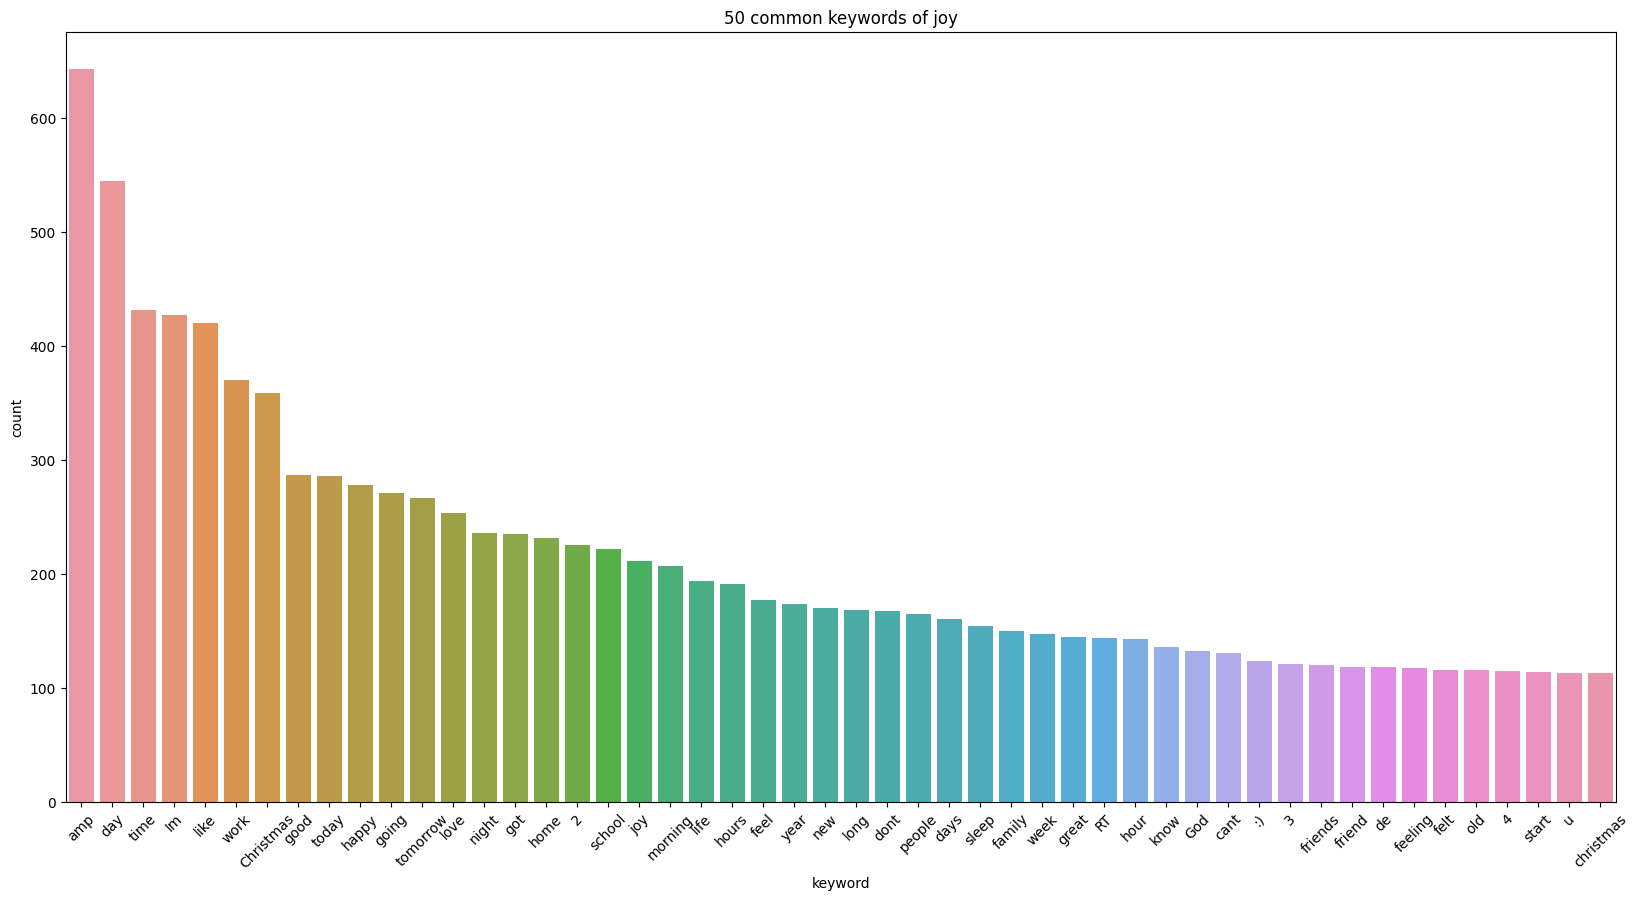

In [38]:
#visualising joy keywords
plotting_keywords(joy_keyword,'joy')

In [39]:
#pip install wordcloud

In [40]:
from wordcloud import WordCloud

In [41]:
#function for wordcloud
def wordcloud_keyword(text,title):
    wc = WordCloud().generate(text)
    plt.figure(figsize=(10,5))
    plt.title(f'wordcloud of {title}')
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')

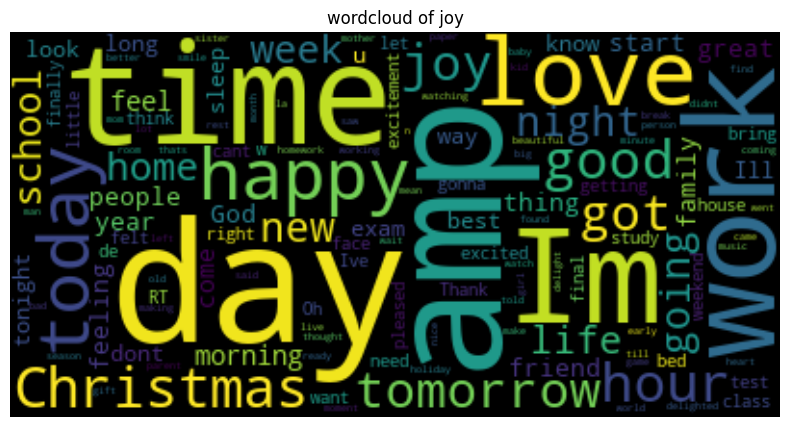

In [42]:
wordcloud_keyword(joy_docs,'joy')

In [43]:
df.head()

,Emotion,Text,sentiment,Clean_Text
0,neutral,Why ?,neutral,
1,joy,Sage Act upgrade on my to do list for tommorow.,neutral,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,negative,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,positive,eye true hazel eyeand brilliant Regular featur...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,neutral,ugh babe hugggzzz u babe naamazed nga ako e ba...


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
#setting features and labels
X = df['Clean_Text']
y = df['Emotion']

In [47]:
#vectorize
vect = CountVectorizer()
X = vect.fit_transform(X)

In [48]:
X

<34792x32402 sparse matrix of type '<class 'numpy.int64'>'
	with 247458 stored elements in Compressed Sparse Row format>

In [49]:
#vect.get_feature_names()

In [50]:
#convert sparse matrix to dense matrix
X = X.toarray()

In [51]:
#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [54]:
#X_train

In [55]:
#Naive bayes model
nv_model = MultinomialNB()

In [56]:
nv_model.fit(X_train,y_train)

MultinomialNB()

In [57]:
pred_nv_model = nv_model.predict(X_test)

In [58]:
nv_model.score(X_test,y_test)

0.5637095228971067

In [59]:
#sample coding
#sample1 = ["I love coding"]

In [60]:
#vgf = vect.transform(sample1)

In [61]:
#vgf = vgf.toarray()

In [62]:
#nv_model.predict(vgf)

In [63]:
#nv_model.predict_proba(vgf)

In [64]:
#nv_model.classes_

In [65]:
#function for predicting user customised texts
def predict_emotion(samp_txt,model):
    samp_txt = vect.transform(samp_txt)
    samp_txt = samp_txt.toarray()
    prediction = model.predict(samp_txt)
    prediction_probablity = model.predict_proba(samp_txt)
    all_pred_prob = dict(zip(model.classes_,prediction_probablity[0]))
    print(f'{prediction[0]} : {np.max(model.predict_proba(samp_txt))}')
    return all_pred_prob

In [66]:
samp_txt = ["Wow i didn't expect you"]
predict_emotion(samp_txt,nv_model)

surprise : 0.47476577246543883


{'anger': 0.18345571077586675,
 'disgust': 0.01216996833380783,
 'fear': 0.03209364204623375,
 'joy': 0.20486688145293086,
 'neutral': 0.02823330358854383,
 'sadness': 0.06426288932975659,
 'shame': 0.00015183200742158157,
 'surprise': 0.47476577246543883}

In [67]:
#logistic regression model
lr_model = LogisticRegression()

In [68]:
lr_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
pred_lr_model = lr_model.predict(X_test)

In [70]:
#checking accuracy
lr_model.score(X_test,y_test)

0.6184134891741713

In [71]:
#samp_txt

In [72]:
predict_emotion(samp_txt,lr_model)

surprise : 0.5749573528129759


{'anger': 0.05913744921112387,
 'disgust': 0.02658850392772745,
 'fear': 0.02427898879792522,
 'joy': 0.051933611693307354,
 'neutral': 0.23395285326408832,
 'sadness': 0.027593436153881316,
 'shame': 0.0015578041389705769,
 'surprise': 0.5749573528129759}

Model Evaluation

In [73]:
#Classification report for naive bayes
print(classification_report(y_test,pred_nv_model))

              precision    recall  f1-score   support

       anger       0.63      0.48      0.55      1283
     disgust       0.52      0.04      0.07       292
        fear       0.74      0.59      0.66      1645
         joy       0.51      0.85      0.64      3311
     neutral       0.31      0.03      0.05       675
     sadness       0.56      0.55      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.60      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


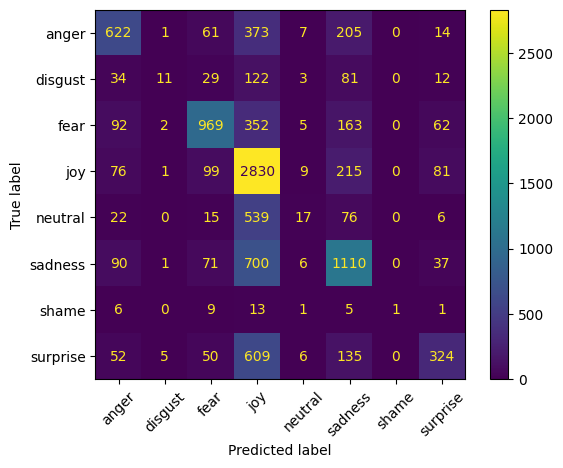

In [74]:
#confusion matrix plot for naive bayes
plot_confusion_matrix(nv_model,X_test,y_test)
plt.xticks(rotation=45)
plt.show()

In [75]:
#classification report for logistic reg
print(classification_report(y_test,pred_lr_model))

              precision    recall  f1-score   support

       anger       0.62      0.55      0.58      1283
     disgust       0.56      0.17      0.26       292
        fear       0.74      0.64      0.68      1645
         joy       0.62      0.76      0.68      3311
     neutral       0.57      0.71      0.64       675
     sadness       0.59      0.57      0.58      2015
       shame       0.84      0.75      0.79        36
    surprise       0.53      0.41      0.46      1181

    accuracy                           0.62     10438
   macro avg       0.63      0.57      0.58     10438
weighted avg       0.62      0.62      0.61     10438



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


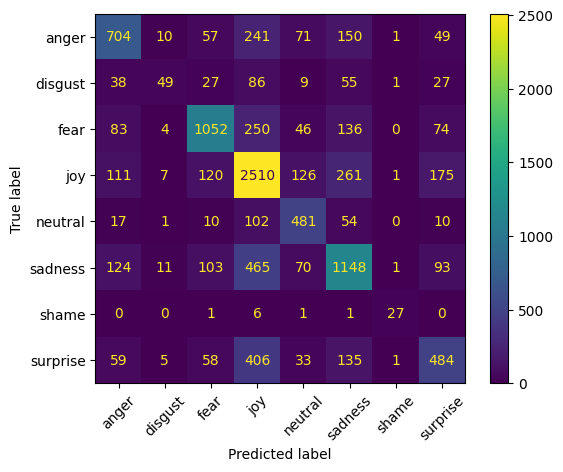

In [76]:
#confusion matrix plot for logistic reg
plot_confusion_matrix(lr_model,X_test,y_test)
plt.xticks(rotation=45)
plt.show()

Serialize and Save Model

In [77]:
import joblib

In [78]:
#saving the naive bayes model using pickle modue
model_save = open("Text_Classification_sentiment_analysis_nv_model.pkl","wb")
joblib.dump(nv_model,model_save)
model_save.close()

In [79]:
#saving the logistic reg model using pickle modue
model_save = open("Text_Classification_sentiment_analysis_lr_model.pkl","wb")
joblib.dump(lr_model,model_save)
model_save.close()

Emotion Detection in Text: An End-to-End NLP Pipeline Using Logistic Regression

Objective:
The primary goal of this project is to develop a robust and efficient pipeline for detecting emotions in text using Natural Language Processing (NLP) techniques and machine learning. By leveraging logistic regression, naive bayes the project aims to classify text into various emotional categories such as joy, sadness, anger, fear, and others.

Dataset:
The project utilizes a dataset containing text samples labeled with corresponding emotions. The dataset is loaded and inspected to understand the distribution of emotions and prepare for subsequent processing.

Methodology:

Data Exploration and Visualization:

Load the dataset using pandas and explore the distribution of emotions using value counts.
Visualize the data distribution using seaborn to understand the frequency of each emotion category.

Data Cleaning:

Employ the neattext library to clean the text data by removing user handles, stopwords, and other irrelevant components.
Create a new column Clean_Text in the dataframe to store the cleaned text.

Feature Engineering:

Define features (cleaned text) and labels (emotions) for the model.
Split the data into training and test sets using train_test_split from sklearn.

Model Building:

Construct a machine learning pipeline using sklearn's Pipeline.
Integrate CountVectorizer for text vectorization and LogisticRegression for classification.
Train the logistic regression model on the training data.

Model Evaluation:

Evaluate the model’s performance on the test set using accuracy score and classification report.
Assess model predictions and prediction probabilities for individual text samples.

Model Saving:

Save the trained model pipeline using joblib for future use and deployment.
